<a href="https://colab.research.google.com/github/HemanthPoojary/Data_Analysis_Projects/blob/main/Logistic_Reg_Social_Adv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [4]:
import io
socio_ads= pd.read_csv(io.BytesIO(data_to_load["Social_Network_Ads.csv"]))

In [5]:
socio_ads.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
socio_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
socio_ads["Gender"]= socio_ads["Gender"].map({"Male":1, "Female":0})

In [8]:
socio_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


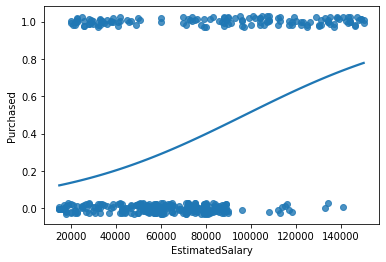

In [9]:
sns.regplot(x="EstimatedSalary",y="Purchased",
            y_jitter=0.03,
            data=socio_ads,
            logistic=True,
            ci=None) #ci= confidence interval
plt.show()

In [10]:
socio_ads.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [11]:
from sklearn.model_selection import train_test_split

train_data,test_data = train_test_split(socio_ads,
                                        test_size=0.30,
                                        random_state=34)

In [12]:
print(train_data)

      User ID  Gender  Age  EstimatedSalary  Purchased
178  15584114       1   24            23000          0
329  15639576       0   47           107000          1
78   15667265       0   28            87000          0
237  15753874       0   37            80000          0
282  15750447       1   37            70000          1
..        ...     ...  ...              ...        ...
324  15575247       0   48           131000          1
85   15663939       0   31           118000          1
246  15638003       0   35            50000          0
361  15778830       0   53            34000          1
122  15724423       0   40            75000          0

[280 rows x 5 columns]


In [13]:
print(test_data)

      User ID  Gender  Age  EstimatedSalary  Purchased
14   15628972       1   18            82000          0
377  15800215       0   42            53000          0
156  15791174       1   46            59000          0
336  15664907       1   58           144000          1
308  15596761       1   36           125000          1
..        ...     ...  ...              ...        ...
80   15595917       1   30            80000          0
158  15762605       1   26            30000          0
196  15738448       0   30            79000          0
250  15810075       0   44            39000          0
309  15652400       0   38            50000          0

[120 rows x 5 columns]


In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

logistic_formula=("Purchased ~ Gender + Age + EstimatedSalary")

#model name
socio_ads= logit(formula= logistic_formula, data=train_data).fit()

Optimization terminated successfully.
         Current function value: 0.340479
         Iterations 8


In [15]:
print(socio_ads.summary())

                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  280
Model:                          Logit   Df Residuals:                      276
Method:                           MLE   Df Model:                            3
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.4793
Time:                        05:30:24   Log-Likelihood:                -95.334
converged:                       True   LL-Null:                       -183.07
Covariance Type:            nonrobust   LLR p-value:                 8.365e-38
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.6532      1.579     -8.014      0.000     -15.748      -9.559
Gender              0.3146      0.368      0.854      0.393      -0.407       1.036
Age                 0.2341      

In [16]:
print(np.exp(socio_ads.params))

Intercept          0.000003
Gender             1.369686
Age                1.263779
EstimatedSalary    1.000035
dtype: float64


In [17]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [18]:
predicted_prob=socio_ads.predict(exog= test_data)

In [19]:
cutoff=0.5

In [20]:
socio_predicted = np.where(predicted_prob > cutoff,1,0)

In [21]:
socio_actual=test_data["Purchased"]

In [22]:
conf_matrix = pd.crosstab(socio_actual,socio_predicted, 
                          rownames= ["actual"],
                          colnames= ["predicted"],
                          margins=True)

In [23]:
print(conf_matrix)

predicted   0   1  All
actual                
0          71   7   78
1          15  27   42
All        86  34  120


In [24]:
accuracy = accuracy_score(socio_actual, socio_predicted)

print('Accuracy: %.2f' % (accuracy*100) + "%")

Accuracy: 81.67%


In [25]:
print(classification_report(socio_actual, socio_predicted))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        78
           1       0.79      0.64      0.71        42

    accuracy                           0.82       120
   macro avg       0.81      0.78      0.79       120
weighted avg       0.81      0.82      0.81       120



In [28]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(socio_actual, socio_predicted)))

F1 Score: 0.7105263157894737


In [29]:
roc_auc = roc_auc_score(socio_actual, socio_predicted)
print('AUC: %.2f' % (roc_auc*100) + "%")

AUC: 77.66%


In [30]:
!pip install plot-metric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


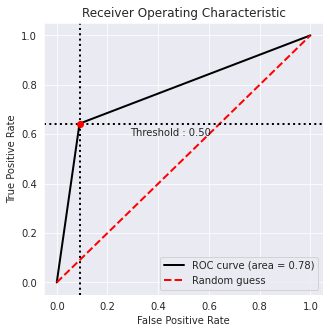

In [31]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(socio_actual,
socio_predicted,
labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()